In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("/content/Depression Professional Dataset.csv")
df.head()

,Gender,Age,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,37,2.0,4.0,7-8 hours,Moderate,No,6,2,No,No
1,Male,60,4.0,3.0,5-6 hours,Unhealthy,Yes,0,4,Yes,No
2,Female,42,2.0,3.0,5-6 hours,Moderate,No,0,2,No,No
3,Female,44,3.0,5.0,7-8 hours,Healthy,Yes,1,2,Yes,No
4,Male,48,4.0,3.0,7-8 hours,Moderate,Yes,6,5,Yes,No


Data Analysis

In [ ]:
df.columns

Index(['Gender', 'Age', 'Work Pressure', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Work Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
df.dtypes

,0
Gender,object
Age,int64
Work Pressure,float64
Job Satisfaction,float64
Sleep Duration,object
Dietary Habits,object
Have you ever had suicidal thoughts ?,object
Work Hours,int64
Financial Stress,int64
Family History of Mental Illness,object


In [ ]:
df.isnull().sum() #checking for null values

,0
Gender,0
Age,0
Work Pressure,0
Job Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Work Hours,0
Financial Stress,0
Family History of Mental Illness,0


<Axes: >

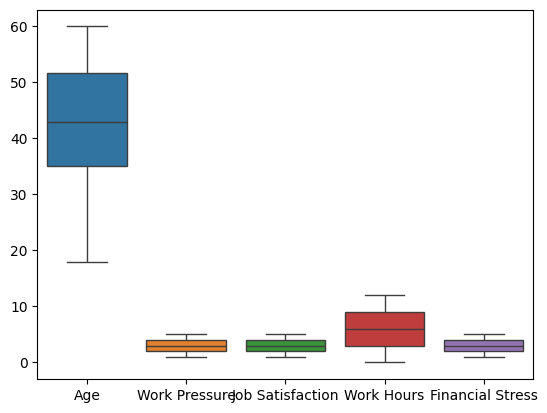

In [ ]:
#Checking for outliers
sns.boxplot(df)                 #No outliers

In [ ]:
df.describe()

,Age,Work Pressure,Job Satisfaction,Work Hours,Financial Stress
count,2054.000000,2054.000000,2054.000000,2054.000000,2054.000000
mean,42.171860,3.021908,3.015093,5.930867,2.978578
std,11.461202,1.417312,1.418432,3.773945,1.413362
min,18.000000,1.000000,1.000000,0.000000,1.000000
25%,35.000000,2.000000,2.000000,3.000000,2.000000
50%,43.000000,3.000000,3.000000,6.000000,3.000000
75%,51.750000,4.000000,4.000000,9.000000,4.000000
max,60.000000,5.000000,5.000000,12.000000,5.000000


In [ ]:
df['Depression'].value_counts()           #class imbalance is there

,count
Depression,
No,1851
Yes,203


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Sleep Duration']=le.fit_transform(df['Sleep Duration'])
df['Depression']=le.fit_transform(df['Depression'])
df['Dietary Habits']=le.fit_transform(df['Dietary Habits'])
df['Have you ever had suicidal thoughts ?']=le.fit_transform(df['Have you ever had suicidal thoughts ?'])
df['Family History of Mental Illness']=le.fit_transform(df['Family History of Mental Illness'])





In [ ]:
x=df.drop(['Depression'],axis=1)
y=df['Depression']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
print(x_train.value_counts().sum())
print(x_test.value_counts().sum())
print(y_train.value_counts().sum())
print(y_test.value_counts().sum())

1437
617
1437
617


In [ ]:
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [ ]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train,y_train=smote.fit_resample(x_train,y_train)


In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
print(" Accuracy Score for DT Model: ",accuracy_score(y_test,dt_pred))

 Accuracy Score for DT Model:  0.9157212317666127


In [ ]:
params={
    'criterion':['gini','entropy'],
    'max_depth':[3,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [ ]:
dt_cv=GridSearchCV(dt,params,cv=10,scoring='accuracy')
dt_cv.fit(x_train,y_train)
dt_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [ ]:
dt_ev=dt_cv.best_estimator_
dt_ev.fit(x_train,y_train)
dt_ev_pred=dt_ev.predict(x_test)
print("Updated Accuracy After HyperTuning: ",accuracy_score(y_test,dt_ev_pred))

Updated Accuracy After HyperTuning:  0.9222042139384117


In [ ]:
print("\nClassification Report after tuning:\n", classification_report(y_test, dt_ev_pred))



Classification Report after tuning:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       555
           1       0.61      0.61      0.61        62

    accuracy                           0.92       617
   macro avg       0.78      0.78      0.78       617
weighted avg       0.92      0.92      0.92       617



AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'